In [1]:
from scipy.signal import find_peaks
from tslearn.clustering import TimeSeriesKMeans

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

/home/faranio/Desktop/Egistic/Fields-Clustering/venv/lib/python3.6/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
DATETIME_FORMAT = '%Y-%m-%d %H:%M:%S+%Z'
RAW_DATA_FOLDER = './data/01_raw'
DATASET_LENGTH = 18
SEQ_LENGTH = 27

In [3]:
def read_dataset():
    X = []
    
    for i in range(DATASET_LENGTH):
        file_path = os.path.join(RAW_DATA_FOLDER, f'vegetation_dataset_{i}.csv')
        df = pd.read_csv(file_path, index_col=0)
        df = df[['ndvi_mean', 'actual_date', 'divided_cadastre_user_id']]
        df['year'] = pd.DatetimeIndex(df['actual_date']).year
        df.dropna(inplace=True)
        
        for divided_cadastre_user_id, group in df.groupby('divided_cadastre_user_id', sort=True):
            for year, group2 in group.groupby('year', sort=True):
                group2.actual_date = pd.DatetimeIndex(group2.actual_date)
                group2.set_index('actual_date', inplace=True)
                group2.sort_index(inplace=True)
                group2.drop(columns=['divided_cadastre_user_id', 'year'], inplace=True)
                
                start_date = f'{year}-05-01'
                end_date = f'{year}-09-30'
                
                yearly_df = group2.loc[f'{start_date}':f'{end_date}'].copy()
                
                if len(yearly_df) < SEQ_LENGTH:
                    continue
                    
                peak_inds, _ = find_peaks(-yearly_df.values[:, 0], prominence=0.06)
                df_without_peaks = yearly_df.iloc[np.delete(np.arange(0, yearly_df.shape[0]), peak_inds)]
                df_without_peaks = df_without_peaks.resample('4D').mean().interpolate()
                
                if len(df_without_peaks) < SEQ_LENGTH:
                    continue
                elif len(df_without_peaks) > SEQ_LENGTH:
                    df_without_peaks = df_without_peaks.sample(SEQ_LENGTH).sort_index()
                
                X.append(df_without_peaks)
                
        print(f"Current length of X: {len(X)}")
    print(f"Final length of X: {len(X)}")
    
    X = np.stack(X)
        
    return X

In [4]:
X = read_dataset()

Current length of X: 181
Current length of X: 463


/home/faranio/Desktop/Egistic/Fields-Clustering/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Current length of X: 748
Current length of X: 756
Current length of X: 791
Current length of X: 818
Current length of X: 818
Current length of X: 820
Current length of X: 820
Current length of X: 825
Current length of X: 867
Current length of X: 938
Current length of X: 996
Current length of X: 997
Current length of X: 1065
Current length of X: 1089
Current length of X: 1561
Current length of X: 1627
Final length of X: 1627


In [11]:
ks = TimeSeriesKMeans().from_pickle('./Productivity_Clustering_Model.pickle')
labels = ks.predict(X)

In [10]:
ks.to_pickle('./Productivity_Clustering_Model.pickle')

1 3 green
1 3 green
2 1 orange
2 1 orange
2 1 orange
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
0 0 red
3 2 blue
3 2 blue
0 0 red
3 2 blue
3 2 blue
2 1 orange
3 2 blue
3 2 blue
3 2 blue
3 2 blue
0 0 red
3 2 blue
3 2 blue
3 2 blue
3 2 blue
3 2 blue
3 2 blue
3 2 blue
1 3 green
0 0 red
3 2 blue
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
2 1 orange
3 2 blue
3 2 blue
2 1 orange
0 0 red
0 0 red
2 1 orange
3 2 blue
3 2 blue
3 2 blue
0 0 red
3 2 blue
3 2 blue
3 2 blue
0 0 red
3 2 blue
2 1 orange
3 2 blue
3 2 blue
3 2 blue
3 2 blue
3 2 blue
0 0 red
0 0 red
3 2 blue
0 0 red
3 2 blue
1 3 green
1 3 green
1 3 green
2 1 orange
1 3 green
2 1 orange
2 1 orange
2 1 orange
2 1 orange
2 1 orange
1 3 green
1 3 green
2 1 orange
2 1 orange
2 1 orange
0 0 red
0 0 red
0 0 red
3 2 blue
3 2 blue
2 1 orange
2 1 orange
0 0 red
2 1 orange
0 0 red
3 2 blue
2 1 orange
0 0 red
0 0 red
0 0 red
0 0 red
2 1 orange
2 1 orange
0 0 red
0 0 red
2 1 orange
1 3 g

0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
3 2 blue
2 1 orange
2 1 orange
3 2 blue
3 2 blue
0 0 red
2 1 orange
2 1 orange
0 0 red
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
3 2 blue
1 3 green
0 0 red
2 1 orange
2 1 orange
2 1 orange
0 0 red
3 2 blue
0 0 red
2 1 orange
0 0 red
3 2 blue
1 3 green
3 2 blue
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
1 3 green
3 2 blue
3 2 blue
3 2 blue
1 3 green
3 2 blue
3 2 blue
3 2 blue
1 3 green
3 2 blue
3 2 blue
3 2 blue
3 2 blue
2 1 orange
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 red
0 0 

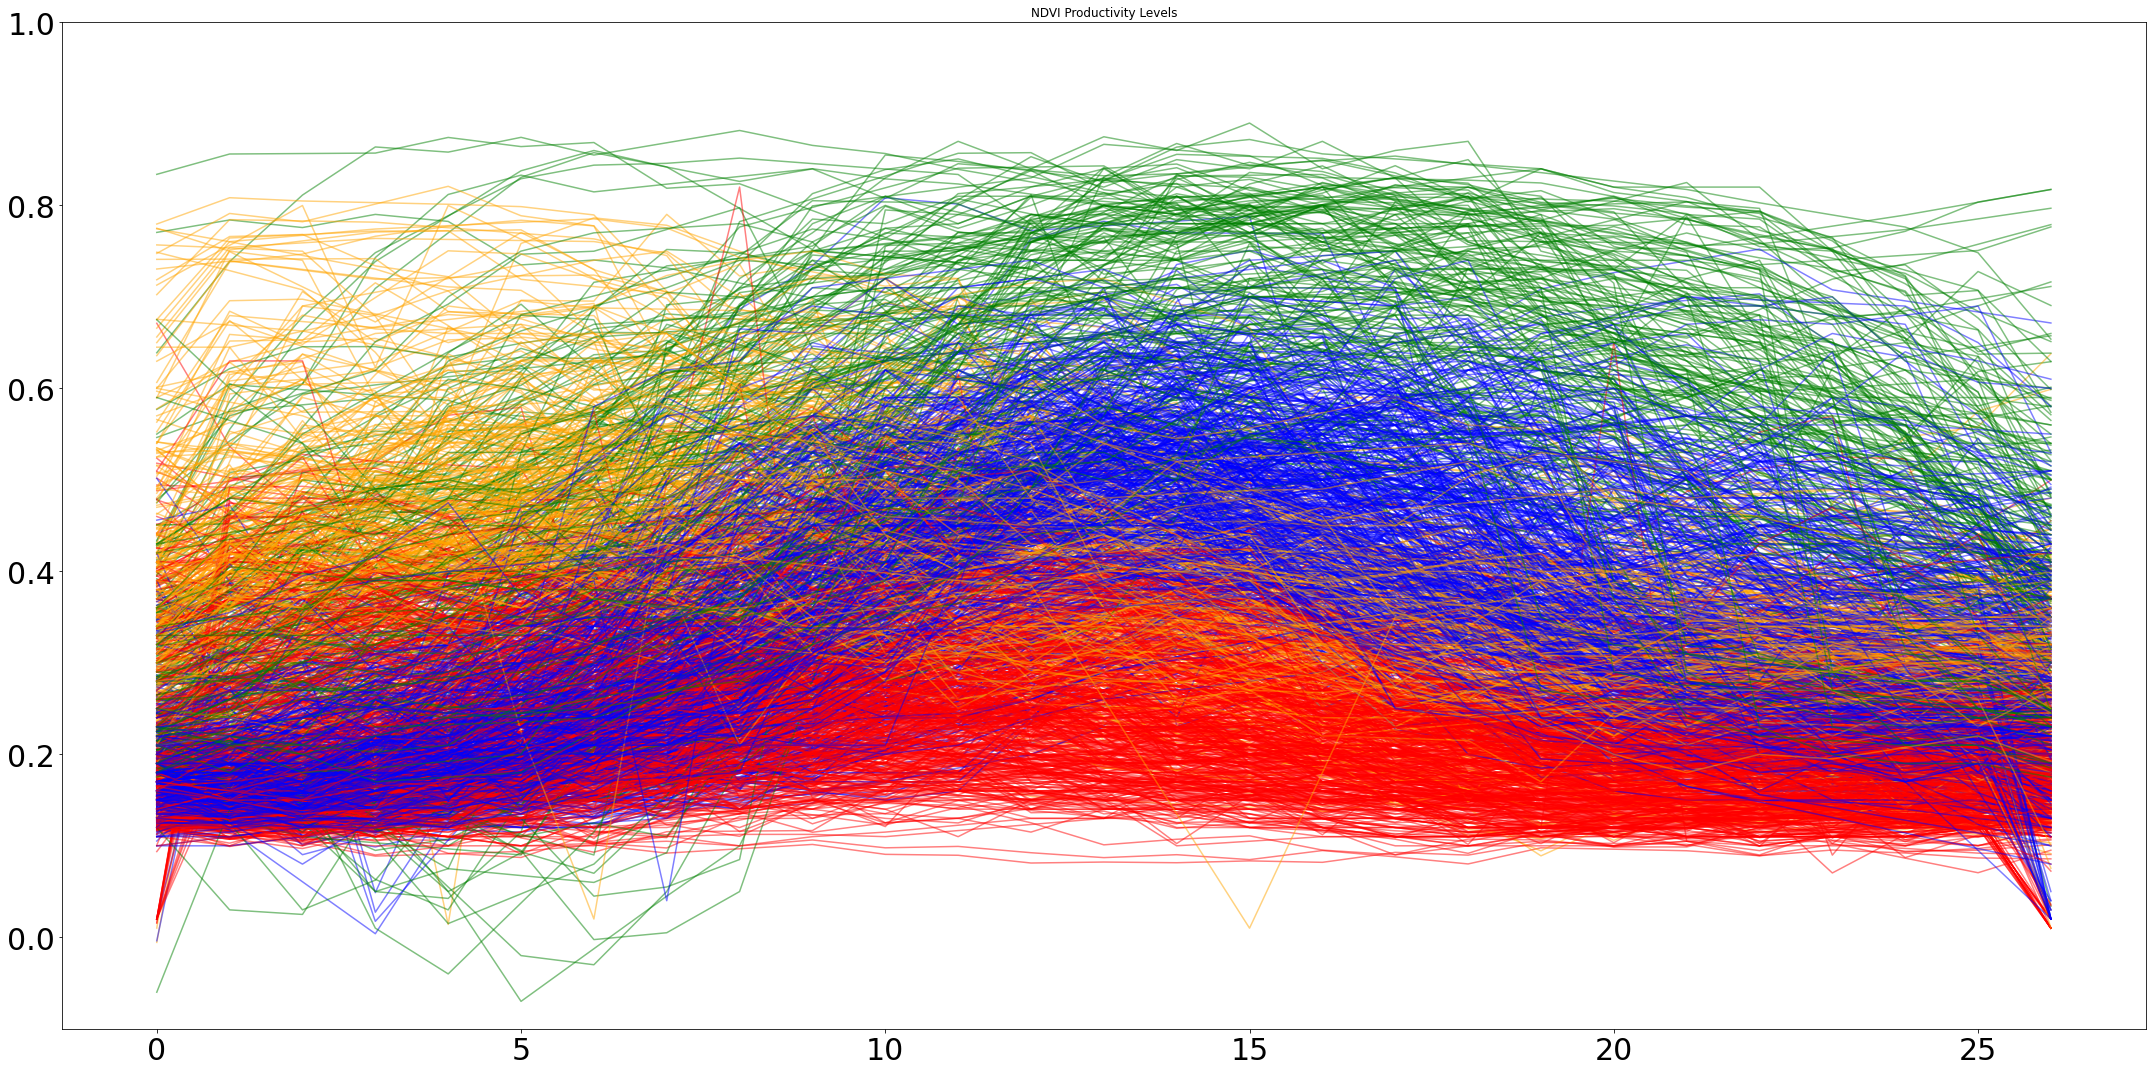

In [12]:
mapping = {
    0: 0,
    2: 1,
    3: 2,
    1: 3
}

fig, ax = plt.subplots(1, 1, figsize=(30, 15))
colors = ['red', 'orange', 'blue', 'green']

for i in range(len(labels)):
    ax.plot(range(27), X[i], color=colors[mapping[labels[i]]], alpha=0.5)
    print(labels[i], mapping[labels[i]], colors[mapping[labels[i]]])
    
# for i in range(4): 
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylim(-0.1, 1)

plt.title("NDVI Productivity Levels")
plt.tight_layout()
plt.show()

In [7]:
pickle.dump(ks, open('./Productivity_Clustering_Model.pickle', 'wb'))

In [ ]:
red = 0:0
blue = 2:1
green = 3:2
orange = 1:3